In [1]:
import numpy as np
import os
import random
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import sklearn.datasets, sklearn.decomposition
from matplotlib.transforms import ScaledTranslation


def traintestMNIST(labels=None, ntrain=None, ntest=None, path=os.path.join('data_for_python', 'mnist.npz')):
    mnist = np.load(path)
    train_x = mnist['train_x']
    train_y = mnist['train_y']
    train = np.asarray(list(zip(train_x, train_y)))

    test_x = mnist['test_x']
    test_y = mnist['test_y']
    test = np.asarray(list(zip(test_x, test_y)))

    if labels:
        train = list(train[np.hstack([np.where(train_y==l) for l in labels]).squeeze()])
        test = list(test[np.hstack([np.where(test_y==l) for l in labels]).squeeze()])

    random.shuffle(train)
    random.shuffle(test)

    train_x, train_y = zip(*train)
    test_x, test_y = zip(*test)

    if ntrain:
        train_x = train_x[:ntrain]
        train_y = train_y[:ntrain]

    if ntest:
        test_x = test_x[:ntest]
        test_y = test_y[:ntest]

    return np.asarray(train_x), np.asarray(train_y), np.asarray(test_x), np.asarray(test_y)

In [17]:
imgs, labs, imgs_test, labs_test = traintestMNIST([2], 5000)

In [18]:
pca = PCA()
pca.fit(imgs)
pcs = pca.components_
print('Principal components:',pcs.shape)
mu = pca.mean_

Principal components: (784, 784)


In [36]:
def r_m(X,mu,pc,ii,m):
    r=0
    for j in range(m+1):
        r=r+np.dot(X[ii]-mu,pc[j])*pc[j]
    return r +mu

'''def err_m(X,mu,pc,m):
    er=0
    for i in range(5000):
        er=er+np.linalg.norm(X[i,:]-np.clip(r_m(X,mu,pc,i,m),0,255),ord=2)**2
    return er*(1/5000)'''

def err_m(X,mu,pc,m):
    er=0
    for jj in range(5000):#pour toutes les images
        er=er+np.linalg.norm(X[jj]-np.clip(r_m(X,mu,pc,jj,m),0,255))**2
    return er*(1/5000)

In [17]:
err_X_m=[]
for m in range(1,50):
    err_X_m.append(err_m(imgs,mu,pcs,m))

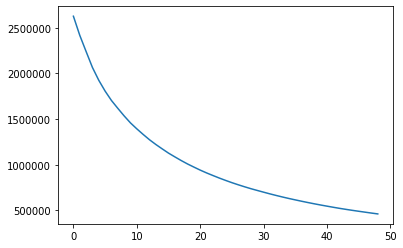

In [18]:
plt.plot(err_X_m)
plt.show()

In [2]:
'''err_m(imgs,mu,pcs,1)'''

'err_m(imgs,mu,pcs,1)'

In [1]:
'''#b) si avec variance ok
tI = pca.fit_transform(imgs) #tI sont les xi_i
teI = pca.transform(imgs_test)

var_pca=pca.explained_variance_ratio_
plt.plot(var_pca)
plt.title('var_pca')
plt.show()

tI_df=pd.DataFrame(tI,columns=range(tI.shape[1])) #cree dataframe des images  
tI_df_var=pd.DataFrame.var(tI_df,axis=0)#calcule variance de chaque colonne (on obtient vecteur de 784 col)
tI_df_var=tI_df_var/sum(tI_df_var) #normalise
tI_df_var_df=pd.DataFrame(tI_df_var,columns=['col1'])
tI_df_var_sorted=tI_df_var_df.sort_values(by='col1', ascending=False)
    
#print(tI_df_var_sorted,tI_df_var_df.shape)    
tI_f=tI_df_var_sorted.cumsum(axis=0)      
plt.plot(tI_f)
plt.title('var_pca_df_cumul')

for index, row in tI_f.iterrows():
    if row['col1'] >= 0.5:
        print('over, les',index,'premiers suffisent pour 0.5')
        break
    
for index, row in tI_f.iterrows():
    if row['col1'] >= 0.75:
        print('over, les',index,'premiers suffisent pour 0.75')
        break

temp=0
for index, row in tI_f.iterrows():
    if row['col1'] >= 1:
        print('over, les',index,'premiers suffisent pour 1')
        temp=1
        break    
if temp==0:
    print('over, pour 100% il les faut tous')
        
for index, row in tI_f.iterrows():
    if row['col1'] >= .99:
        print('over, les',index,'premiers suffisent pour 0.99')
        break '''

"#b) si avec variance ok\ntI = pca.fit_transform(imgs) #tI sont les xi_i\nteI = pca.transform(imgs_test)\n\nvar_pca=pca.explained_variance_ratio_\nplt.plot(var_pca)\nplt.title('var_pca')\nplt.show()\n\ntI_df=pd.DataFrame(tI,columns=range(tI.shape[1])) #cree dataframe des images  \ntI_df_var=pd.DataFrame.var(tI_df,axis=0)#calcule variance de chaque colonne (on obtient vecteur de 784 col)\ntI_df_var=tI_df_var/sum(tI_df_var) #normalise\ntI_df_var_df=pd.DataFrame(tI_df_var,columns=['col1'])\ntI_df_var_sorted=tI_df_var_df.sort_values(by='col1', ascending=False)\n    \n#print(tI_df_var_sorted,tI_df_var_df.shape)    \ntI_f=tI_df_var_sorted.cumsum(axis=0)      \nplt.plot(tI_f)\nplt.title('var_pca_df_cumul')\n\nfor index, row in tI_f.iterrows():\n    if row['col1'] >= 0.5:\n        print('over, les',index,'premiers suffisent pour 0.5')\n        break\n    \nfor index, row in tI_f.iterrows():\n    if row['col1'] >= 0.75:\n        print('over, les',index,'premiers suffisent pour 0.75')\n        b

In [34]:
#partie 2)

imgs2, labs2, imgs_test2, labs_test2 = traintestMNIST([2], 5)

pca2 = PCA()
pca2.fit(imgs)
pcs2 = pca.components_
mu2 = pca.mean_

D:\Programmes\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  if sys.path[0] == '':


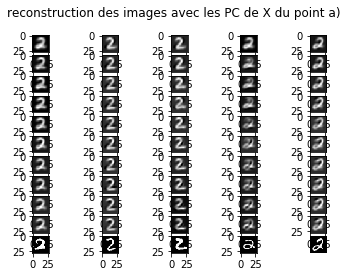

In [37]:
fig, axes = plt.subplots(nrows=11, ncols=5)


for i in range(5):#les 5 images
    for j in range(10):#les 10 m
        axes[j,i].imshow(r_m(imgs2,mu2,pcs,i,j).reshape((28,28)),cmap='gray')
        
    axes[10,i].imshow(imgs2[i].reshape((28,28)),cmap='gray')


plt.axis("off")
fig.tight_layout()
fig.suptitle("reconstruction des images avec les PC de X du point a)")
plt.show()